# Scenario Generation

Notebook for generating the scenarios for the team assignment.

In [1]:
using CSV
using DataFrames
using Plots
using Statistics

In [2]:
using Distributions
using Random
using Clustering

In [3]:
gr()

Plots.GRBackend()

In [4]:
# Reading the data
df = CSV.read("data/scen_zone1.out", DataFrame)
df = dropmissing(df, disallowmissing=true)

┌ Warning: thread = 1 warning: only found 1 / 101 columns around data row: 44. Filling remaining columns with `missing`
└ @ CSV C:\Users\user\.julia\packages\CSV\aoJqo\src\file.jl:586
┌ Warning: thread = 1 warning: only found 1 / 101 columns around data row: 44. Filling remaining columns with `missing`
└ @ CSV C:\Users\user\.julia\packages\CSV\aoJqo\src\file.jl:586


Row,Column1,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,⋯
,String3,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,1,0.38446,0.5077,0.464001,0.476854,0.48001,0.354537,0.60302,0.636561,0.470492,0.511493,0.606389,0.416816,0.49045,0.626075,0.624892,0.453346,0.473867,0.463209,0.480927,0.706977,0.502125,0.611043,0.551823,0.364299,0.626913,0.541001,0.487075,0.627999,0.452509,0.459935,0.626004,0.618834,0.761323,0.546258,0.560171,0.381015,0.684417,0.526615,0.475871,0.561332,0.46741,0.58371,0.674228,0.549045,0.522676,0.530223,0.415527,0.650325,0.571348,0.415866,0.535395,0.577562,0.544713,0.543573,0.57059,0.441378,0.255143,0.59169,0.459174,0.646069,0.426053,0.312949,0.711288,0.540132,0.526172,0.592612,0.597653,0.480313,0.495607,0.45575,0.570104,0.614129,0.627194,0.506959,0.466467,0.457418,0.620382,0.372349,0.491648,0.676267,0.395858,0.39381,0.657044,0.669926,0.480308,0.482961,0.605827,0.6573,0.47672,0.473898,0.447399,0.592827,0.565337,0.429086,0.52301,0.479848,0.639469,0.454563,0.492117,⋯
2,2,0.334138,0.454995,0.545837,0.539686,0.518081,0.563092,0.684236,0.681173,0.475441,0.440283,0.662615,0.51075,0.561861,0.709356,0.700359,0.525169,0.632762,0.536933,0.60754,0.716141,0.611999,0.613903,0.640047,0.449948,0.537643,0.584673,0.572446,0.602264,0.653255,0.56132,0.700715,0.664085,0.828783,0.608853,0.639309,0.508059,0.763335,0.606629,0.580337,0.654286,0.601355,0.632083,0.674786,0.592381,0.588241,0.569931,0.545706,0.615596,0.698651,0.512223,0.626157,0.634874,0.577907,0.553887,0.614132,0.481721,0.503927,0.527462,0.502893,0.643745,0.520881,0.458471,0.764369,0.708556,0.576804,0.71468,0.650177,0.437167,0.615549,0.452318,0.654428,0.685781,0.716374,0.637693,0.524245,0.619485,0.597644,0.315629,0.550323,0.80946,0.431139,0.314214,0.695391,0.742809,0.656079,0.496417,0.626568,0.82576,0.494399,0.5822,0.551758,0.702901,0.562386,0.474245,0.548452,0.552368,0.688773,0.505075,0.529714,⋯
3,3,0.39211,0.584795,0.714401,0.673901,0.641382,0.669161,0.721244,0.724912,0.704373,0.551685,0.743107,0.688747,0.593206,0.732949,0.748441,0.515608,0.678436,0.562457,0.712531,0.757442,0.698512,0.709832,0.676163,0.519514,0.709314,0.734725,0.727541,0.674281,0.702869,0.52987,0.752122,0.721477,0.807639,0.694228,0.640056,0.564766,0.79905,0.703761,0.720828,0.740757,0.732181,0.751057,0.744628,0.680328,0.734519,0.675733,0.714059,0.732159,0.751315,0.602024,0.724324,0.764869,0.688414,0.729704,0.743138,0.673132,0.609384,0.604538,0.564107,0.742374,0.574818,0.600794,0.793179,0.747853,0.648084,0.755126,0.712726,0.441504,0.691816,0.683376,0.75825,0.740442,0.752304,0.661479,0.651331,0.603603,0.707473,0.37659,0.694276,0.804138,0.389058,0.682178,0.764446,0.71837,0.761624,0.599142,0.763177,0.808314,0.675173,0.737562,0.66409,0.76117,0.617379,0.592232,0.60207,0.66711,0.777771,0.631309,0.68559,⋯
4,4,0.320718,0.671243,0.797851,0.668318,0.714843,0.771167,0.735419,0.801257,0.770115,0.721009,0.814959,0.792235,0.772999,0.775471,0.799158,0

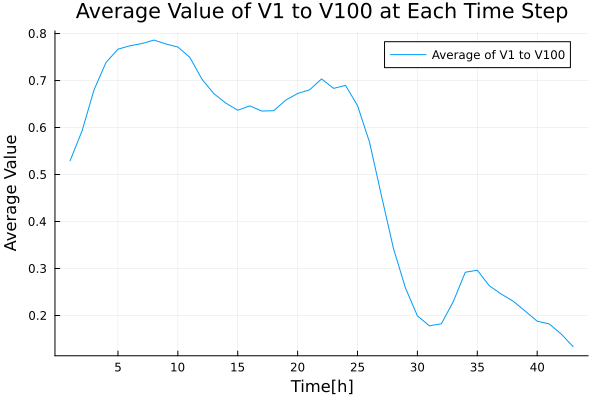

In [5]:
mean_values = mean.(eachrow(df[:, 2:end]))

# Plotting the mean values against the time steps 
plot(df[:, 1], mean_values, label="Average of V1 to V100", xlabel="Time[h]", ylabel="Average Value", title="Average Value of V1 to V100 at Each Time Step")



In [6]:
# Calculate the average of V1 to V100 for each row, handling missing data
# Create an array to store the average values
average_column = Float64[]

# Iterate over each row and compute the mean of the columns V1 to V100
for row in eachrow(df)
    # Use skipmissing to exclude missing values from the mean calculation
    push!(average_column, mean(skipmissing(row[2:101])))
end

# Use the first 24 rows for fitting the Weibull distribution
average_first_24 = average_column[1:24]

# Fit the Weibull distribution to the average of the first 24 rows
fitted_dist = fit_mle(Weibull, average_first_24)

# Set the number of scenarios you want to generate for each time step
num_scenarios = 10000

# Initialize a random number generator
rng = MersenneTwister()

# Generate scenarios for each of the 24 time steps
scenarios_matrix = [rand(rng, fitted_dist, num_scenarios) for _ in 1:24]

# Convert the scenarios matrix to a DataFrame
# First, convert scenarios_matrix (which is a vector of vectors) to a matrix
scenarios_matrix = hcat(scenarios_matrix...)

# Now, you can safely convert it to a DataFrame
scenarios_df = DataFrame(scenarios_matrix, :auto)

Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.746981,0.741494,0.783301,0.681815,0.615053,0.637844,0.642627,0.638647,0.746928,0.724768,0.781564,0.684224,0.760358,0.740015,0.574213,0.729245,0.772078,0.787761,0.712803,0.659066,0.78724,0.817189,0.754049,0.4679
2,0.720265,0.631056,0.664841,0.613235,0.771311,0.752256,0.678774,0.706511,0.747903,0.719199,0.783767,0.75423,0.67123,0.799401,0.799035,0.735522,0.678327,0.679312,0.58549,0.721258,0.657395,0.782125,0.692995,0.686315
3,0.722103,0.462055,0.686053,0.714527,0.657372,0.778781,0.716955,0.677833,0.695038,0.768153,0.667731,0.605499,0.777852,0.688799,0.721863,0.757883,0.759655,0.700034,0.756115,0.608416,0.631567,0.808534,0.759771,0.701211
4,0.748065,0.744712,0.677921,0.704594,0.763238,0.706973,0.689512,0.716184,0.547229,0.791969,0.659197,0.597008,0.674114,0.656396,0.712764,0.628762,0.74351,0.710439,0.657433,0.792804,0.736584,0.643168,0.759647,0.659223
5,0.676241,0.751417,0.716276,0.773093,0.672076,0.710492,0.711593,0.677734,0.700658,0.792332,0.595922,0.668988,0.685624,0.68387,0.756075,0.657307,0.756335,0.543154,0.728859,0.647948,0.746657,0.71637,0.738792,0.620515
6,0.66332,0.724098,0.627119,0.819901,0.654533,0.666679,0.72087,0.65824,0.712364,0.787196,0.74999,0.750888,0.629037,0.716829,0.661188,0.743112,0.607373,0.595088,0.705215,0.707661,0.616537,0.629955,0.741672,0.723864
7,0.695175,0.720177,0.471034,0.749965,0.65844,0.703662,0.619289,0.767294,0.767866,0.574384,0.630791,0.667091,0.726229,0.778618,0.776593,0.72929,0.69222,0.704699,0.724688,0.707156,0.541336,0.560147,0.699488,0.666286
8,0.580877,0.736485,0.826612,0.698833,0.716696,0.750225,0.71988,0.569652,0.675216,0.715083,0.673757,0.720818,0.717989,0.753908,0.7156,0.719826,0.600689,0.698058,0.791375,0.716367,0.784811,0.716911,0.733426,0.739744
9,0.682654,0.70466,0.675208,0.719811,0.740948,0.610935,0.679267,0.674583,0.693493,0.80707,0.73519,0.76714,0.745182,0.718048,0.695543,0.706955,0.656422,0.640063,0.633387,0.735505,0.751455,0.700249,0.657023,0.737437


## Clustering

In [14]:
# Transpose matrix to generate centers
km = kmeans(scenarios_matrix', 101)


KmeansResult{Matrix{Float64}, Float64, Int64}([0.6961884726446709 0.7156751302618362 … 0.6948579930382676 0.684241417427541; 0.6963826177262985 0.7006733730823709 … 0.7114161121076544 0.718453856370681; … ; 0.6428869023501466 0.6689261462270754 … 0.7030815622849245 0.7174595753558572; 0.6954020023736446 0.6949198441792588 … 0.7004081969219563 0.6549099200852405], [36, 18, 33, 94, 101, 2, 7, 56, 68, 24  …  10, 97, 77, 78, 47, 85, 71, 36, 43, 16], [0.1052134705964427, 0.06945524149005067, 0.063840477577358, 0.065021659913576, 0.057442797387601274, 0.0658473767052854, 0.10217200400607496, 0.062037600490892686, 0.033077882163819794, 0.042145442867351335  …  0.05393650241697401, 0.08774222155226852, 0.051879825146016856, 0.10348869584580811, 0.08165446919934283, 0.0451765100398589, 0.11578038886257858, 0.05832051727757914, 0.05576260369427999, 0.06440130717069081], [96, 93, 84, 83, 73, 126, 80, 89, 108, 107  …  110, 94, 83, 85, 134, 136, 113, 75, 103, 111], [96, 93, 84, 83, 73, 126, 80, 89,

In [15]:
km.centers

24×101 Matrix{Float64}:
 0.696188  0.715675  0.72652   0.71215   …  0.66188   0.694858  0.684241
 0.696383  0.700673  0.708733  0.697564     0.703709  0.711416  0.718454
 0.709971  0.628344  0.702929  0.709536     0.702722  0.699355  0.717281
 0.709452  0.732681  0.70064   0.677299     0.695647  0.696231  0.710487
 0.706044  0.68052   0.643582  0.715801     0.724656  0.686436  0.700761
 0.710318  0.703298  0.738504  0.711058  …  0.676635  0.686939  0.726079
 0.718147  0.722831  0.746111  0.70368      0.69337   0.697276  0.740843
 0.688166  0.560252  0.672078  0.686448     0.706809  0.684353  0.684534
 0.73374   0.715387  0.714777  0.686936     0.52301   0.681502  0.697426
 0.707255  0.729729  0.697942  0.694314     0.729595  0.502871  0.680719
 0.706569  0.679504  0.694273  0.698228  …  0.682446  0.70222   0.704038
 0.535576  0.69279   0.585266  0.72643      0.716455  0.699894  0.659616
 0.714979  0.69465   0.71637   0.70751      0.669411  0.698087  0.682841
 0.722382  0.716013  0.6667

Problems: Monte Carlo approach correctly implemented? Data just from one day (i.e. first 24 hours) with high wind speed.